<img src="https://drive.google.com/uc?id=18MkrAGhuEuoSAmz8foljato25V8rAK9Q" width="800" height="310" align="right">


 # <center>**PROYECTO FINAL DE INTELIGENCIA ARTIFICIAL**

# **ANÁLISIS ESTADÍSTICO SOBRE COVID-19** <br>
 **INTRODUCCIÓN:** <br>
 <DIV ALIGN="justify"><P>En estos últimos meses no ha salido tema más importante que hablar que del coronavirus, una pandemia que se ha venido registrando cada vez con más fuerza alrededor del mundo, la cual va dejando actualmente cientos de muertos diarios, miles de contagiados y nuevos sectores infectados. Los datos que deja la propagación se han venido actualizando con el tiempo, sin embargo tenemos poca claridad en lo que consiste a cada caso, cada persona que se encuentra infectada; por otra parte, la mayoría de datos generados son estadísticos, una sumatoria total de cada factor analizado, muertes, contagiados y recuperados; esto con el fin de tomar en cuenta que la información a analizar viene con completo detalle para hacer un análisis estadístico independiente a los realizados por distintos analistas de datos alrededor del mundo.  <br> <br>

 **OBJETIVOS:** <br>
 <DIV ALIGN="justify"><P>


*   Predecir el estado vital de pacientes con determinada edad.
*   Trazar y analizar comportamientos estadísticos proporcionados por los datos.
*   Implementar el uso de diversos mecanismos vistos en el curso para análisis, predicción y comprobación de acertación en el tratamiento de datos






In [1]:
#Monta el Drive en el colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Se cambia la ubicacion
%cd drive/'My Drive'/Covid19
!pwd

/content/drive/My Drive/Covid19
/content/drive/My Drive/Covid19


In [0]:
#Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer,accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import time
from datetime import datetime

In [0]:
#Lectura del dataset
data = pd.read_excel("data/DataCoronaExcel.xlsx")
data1 = pd.read_csv("data/COVID19_line_list_data.csv")

In [5]:
print(data.shape,data1.shape)
print(data.columns)
print(data1.columns)

(3397, 23) (1085, 27)
Index(['id', 'case_in_country', 'reporting date', 'summary', 'location',
       'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'international_traveler', 'domestic_traveler',
       'exposure_start', 'exposure_end', 'traveler', 'visiting Wuhan',
       'from Wuhan', 'death', 'recovered', 'symptom', 'source', 'link'],
      dtype='object')
Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')


In [6]:
print('Data\n')
print(pd.isnull(data).sum())

Data

id                           0
case_in_country            197
reporting date               1
summary                      5
location                   230
country                    163
gender                    1712
age                       1890
symptom_onset             2713
If_onset_approximated     2742
hosp_visit_date           2777
international_traveler    2571
domestic_traveler         2595
exposure_start            3203
exposure_end              2909
traveler                  2737
visiting Wuhan            1791
from Wuhan                1795
death                     1778
recovered                 1791
symptom                   3059
source                    1791
link                      1775
dtype: int64


In [7]:
print('Data 1\n')
print(pd.isnull(data1).sum())

Data 1

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64


In [0]:
data.drop(['id', 'case_in_country', 'summary','location','symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'international_traveler', 'domestic_traveler',
       'exposure_start', 'exposure_end', 'traveler', 'visiting Wuhan',
       'from Wuhan', 'symptom', 'source', 'link'],axis = 1, inplace = True)

data1.drop(['id', 'case_in_country', 'Unnamed: 3', 'summary','location','symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],axis = 1, inplace = True)

In [9]:
data1['recovered'] = np.where(data1['recovered']=='0',0,1)
data1['death'] = np.where(data1['death']=='0',0,2)

print('Shape data:',data.shape,'\nShape data1:',data1.shape)
data = pd.concat([data, data1], ignore_index=True)
print('\nNew Shape data:',data.shape)

Shape data: (3397, 6) 
Shape data1: (1085, 6)

New Shape data: (4482, 6)


In [10]:
data.head()

,reporting date,country,gender,age,death,recovered
0,1/20/2020,China,male,66.0,0,0
1,1/20/2020,China,female,56.0,0,0
2,1/21/2020,China,male,46.0,0,0
3,1/21/2020,China,female,60.0,0,0
4,1/21/2020,China,male,58.0,0,0


In [11]:
print(pd.isnull(data1).sum())

reporting date      1
country             0
gender            183
age               242
death               0
recovered           0
dtype: int64


In [12]:
promedio = int(data["age"].mean())
print(promedio)

50


In [0]:
def timeToMilli(x):
    if (type(x) is str):
      split = x.split("/")
      if len(split[2])==4:
        x = datetime(int(split[2]), int(split[0]), int(split[1]))
      else:
        x = datetime(2000 + int(split[2]), int(split[1]), int(split[0]))
      milliseconds = int(round(x.timestamp() * 1000))
    else:
      milliseconds = int(round(x.timestamp() * 1000))
    return milliseconds

In [0]:
data["age"] = data["age"].replace(np.nan,promedio)
data['age'] = data['age'].astype('int64')

data["gender"].replace(["male","female"],[0,1],inplace=True)
data["gender"] = data["gender"].replace(np.nan,2)
data['gender'] = data['gender'].astype('int64')

data["country"].replace(['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore',
       'South Korea', 'Taiwan', 'Thailand', 'USA', 'Vietnam', 'Australia',
       'Canada', 'Cambodia', 'Sri Lanka', 'Germany', 'UAE', 'Hong Kong',
       'Italy', 'Russia', 'UK', 'India', 'Phillipines', 'Finland',
       'Spain', 'Sweden', 'Belgium', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Kuwait', 'Bahrain', 'Austria', 'Afghanistan', 'Algeria',
       'Croatia', 'Switzerland'],range(38),inplace=True)


data["death"] = data["death"].replace(np.nan,0)
data['death'] = np.where(data['death']!=0,2,0)
data["recovered"] = data["recovered"].replace(np.nan,0)
data['recovered'] = np.where(data['recovered']!=0,1,0)

data.dropna(axis=0,how='any',inplace=True)

data['reporting date'] = data['reporting date'].apply(timeToMilli)

In [15]:
print(pd.isnull(data).sum())

reporting date    0
country           0
gender            0
age               0
death             0
recovered         0
dtype: int64


In [16]:
total = data.shape[0]
muertos = data['death'].eq(2).sum()
recuperados = data['recovered'].eq(1).sum()
infectados = total - muertos - recuperados
print('Datos totales : ', total)
print('Numero Muertos : ', muertos)
print('Numero Recuperados : ', recuperados)
print('Numero Infectados : ', infectados)

Datos totales :  4317
Numero Muertos :  146
Numero Recuperados :  342
Numero Infectados :  3829


In [0]:
data['state'] = data['death'].combine(data['recovered'],max)
data.drop(['death','recovered'],axis = 1, inplace = True)

In [0]:
#pd.set_option('display.max_rows', data.shape[0]+1)

In [0]:
#pd.set_option('display.max_rows', 100)

In [0]:
X = np.array(data.drop(['state'],1))
y = np.array(data['state'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23)

In [20]:
X_train.shape

(3324, 4)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4317 entries, 0 to 4481
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reporting date  4317 non-null   int64  
 1   country         4317 non-null   float64
 2   gender          4317 non-null   int64  
 3   age             4317 non-null   int64  
 4   state           4317 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 362.4 KB


In [22]:
svc = SVC()
svc.fit(X_train,y_train)
print("\nSVC Score:                    ",svc.score(X_test,y_test))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("\nKNeighborsClassifier Score:   ",knn.score(X_test,y_test))

gnb = GaussianNB()
gnb.fit(X_train,y_train)
print("\nGaussianNB Score:             ",gnb.score(X_test,y_test))

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
print("\nDecisionTreeClassifier Score: ",dtc.score(X_test,y_test))

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,y_train)
print("\nRandomForestClassifier Score: ", rfc.score(X_test,y_test))


SVC Score:                     0.8841893252769386

KNeighborsClassifier Score:    0.9023162134944612

GaussianNB Score:              0.8841893252769386

DecisionTreeClassifier Score:  0.9718026183282981

RandomForestClassifier Score:  0.8841893252769386


In [0]:
def show_curve(est,X,y):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("Comportamiento")
    plt.legend()
    plt.grid(False)

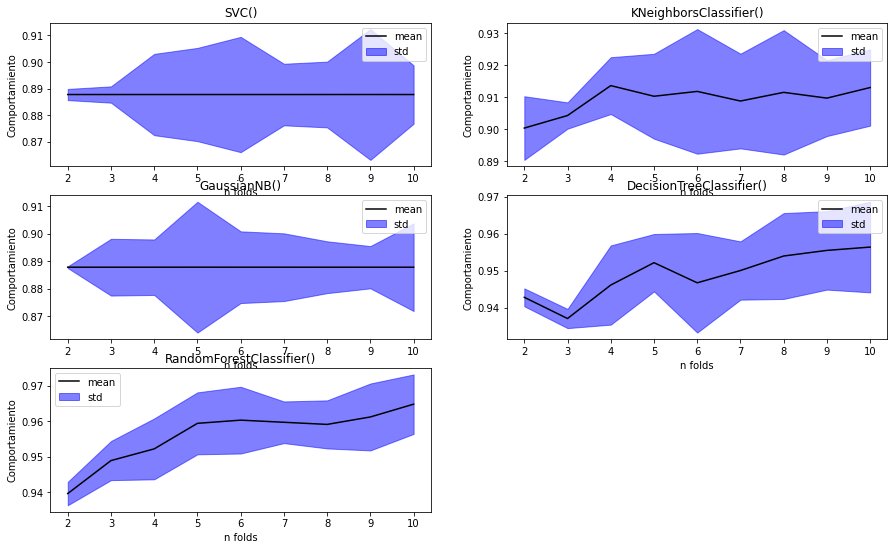

In [37]:
estimadores=[SVC(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier()]
C=["SVC()","KNeighborsClassifier()","GaussianNB()","DecisionTreeClassifier()","RandomForestClassifier()"]
plt.figure(figsize=(15,9))
for i,este in enumerate(estimadores):
    plt.subplot(3,2,i+1)
    plt.title(C[i])
    show_curve(este,X_train,y_train)